In [ ]:
# !pip install episcanpy
# !pip install scanpy
# !pip install anndata
# !pip install desc
# !pip install display

     |████████████████████████████████| 50.3 MB 2.2 MB/s 
     |████████████████████████████████| 91 kB 8.2 MB/s 
     |████████████████████████████████| 2.0 MB 33.6 MB/s 
     |████████████████████████████████| 184 kB 46.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 4.0 MB 31.4 MB/s 
     |████████████████████████████████| 14.9 MB 22.1 MB/s 
     |████████████████████████████████| 1.1 MB 52.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for episcanpy: filename=episcanpy-0.3.2-py3-none-any.whl size=125232 sha256=d89689dcfb7418a6f9e7b78c6ab615f74e29ca16815a144d63677098130284fd
  Stored in directory: /root/.cache/pip/wheels/80/ee/b2/c1d719a7519d3eb034a7959d6bb24ac5603a783c75b45c8b12
  Created wheel for bamnostic: filename=bamnostic-1.1.8-py3-none-any.whl size=178415 sha256=c

In [51]:
import numpy as np
import pandas as pd
import scanpy as sc
import gzip
import csv
import os
import desc as desc
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.4.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.10.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content/drive/My Drive/Projects and research stuffs')
!ls "/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio"

Mounted at /content/drive
Assignment1_Submission.ipynb  LDA_ATACSEQ_KMEANS6.png  PCA_NMF_DICE_COEFF.png
ATACSEQ_RAW_KMEANS6.png       NMF_ATACSEQ_KMEANS6.png  RNASEQ_PCA_KMEANS6.png
data			      PCA_LDA_DICE_COEFF.png   RNASEQ_RAW_KMEANS6.png


In [ ]:
results_file = 'a1_pca_output.h5ad'  # the file that will store the analysis results

### Using this to load data: https://support.10xgenomics.com/single-cell-gene-expression/software/pipelines/latest/output/matrices#mat-py

In [ ]:
def load_data(file_dir):
    
    import csv
    import gzip
    import os
    import scipy.io

    # define MTX directory
    matrix_dir = file_dir
    # read in MTX format matrix as table
    mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx.gz"))

    # list of transcript ids, e.g. 'ENSG00000243485'
    features_path = os.path.join(matrix_dir, "features.tsv.gz")
    # feature_ids = [row[0] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]

    # list of gene names, e.g. 'MIR1302-2HG'
    gene_names = [row[0] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]

    # list of feature_types, e.g. 'Gene Expression'
    # feature_types = [row[2] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv.gz")
    barcodes = [row[0] for row in csv.reader(gzip.open(barcodes_path, mode="rt"), delimiter="\t")]
    
    # transform table to pandas dataframe and label rows and columns
    rna_seq = pd.DataFrame.sparse.from_spmatrix(mat)
    
    rna_seq.columns = barcodes
    # matrix.insert(loc=0, column="feature_id", value=feature_ids)
    rna_seq.index =gene_names
    rna_seq = rna_seq.T
    # matrix.to_csv("data/RNAseq/mex_matrix.csv", index=False)

    return rna_seq # returns dataframe
    
    
def load_data_final(file_dir):
    adata = sc.read_mtx( file_dir + '/matrix.mtx').T
    
    features_path = os.path.join(file_dir, "features.tsv.gz")

    # list of gene names, e.g. 'MIR1302-2HG'
    gene_names = [row[0] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]

    # list of feature_types, e.g. 'Gene Expression'
    barcodes_path = os.path.join(file_dir, "barcodes.tsv.gz")
    barcodes = [row[0] for row in csv.reader(gzip.open(barcodes_path, mode="rt"), delimiter="\t")]
    
    from scipy.io import mmread
    adata_mmread = mmread(file_dir + '/matrix.mtx.gz')
    adata_mmread = adata_mmread.T
    m = adata_mmread.tocsr()
    adata = sc.AnnData(m, dict(obs_name=barcodes), dict(var_names=gene_names) )
#     print(adata.shape)
    
    return adata

In [ ]:
rna_dir = '/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/data/RNAseq'

In [ ]:
rna_seq = load_data(rna_dir)

In [ ]:
# rna_seq.columns = barcodes
# # matrix.insert(loc=0, column="feature_id", value=feature_ids)
# rna_seq.index =gene_names
# rna_seq = rna_seq.T
# # matrix.to_csv("data/RNAseq/mex_matrix.csv", index=False)


In [ ]:
rna_seq.head()

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610030E20Rik,0610031O16Rik,0610037L13Rik,0610038B21Rik,0610039K10Rik,0610040B10Rik,0610040F04Rik,0610040J01Rik,0610043K17Rik,1110001J03Rik,1110002E22Rik,1110002J07Rik,1110002L01Rik,1110002O04Rik,1110004E09Rik,1110004F10Rik,1110006O24Rik,1110007C09Rik,1110008E08Rik,1110008F13Rik,1110008L16Rik,1110008P14Rik,1110015O18Rik,1110017D15Rik,1110018N20Rik,1110019D14Rik,1110020A21Rik,1110025M09Rik,1110028F18Rik,1110032A03Rik,1110032F04Rik,1110034G24Rik,1110035H17Rik,...,Serpina1f,Sftpd,Sost,Spink12,Ssxb6,Tas2r119,Tchhl1,Tcrg-V6,Tmem102,Tmem167-ps1,Tmem247,Tnfrsf14,Tnni2,Trav1,Trbd1,Trbv14,Trbv31,Trdj2,Trpd52l3,Ttc30a2,Ttr,Ube2v1,V1ra8,V1rd19,Vmn1r-ps128,Vmn1r-ps49,Vmn1r14,Vmn1r171,Vmn1r181,Vmn1r193,Vmn1r68,Vmn1r82,Vmn2r-ps23,Vmn2r-ps24,Vmn2r-ps45,Vmn2r-ps83,Vmn2r50,Vpreb2,n-R5s32,n-R5s50
09A_CAGCCCCGCCTT,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
09A_CGCCTACCATGA,0,0,0,3,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
09A_GATGCGCGGCTA,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
09A_GGTCCGAGTCCT,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
09A_TCTCCCGGCACC,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### When looking at the five number summary of this data, I get error because standard dev. can not be calculated for SPARSE matrix. Why is RNAseq data sparse? Only ATAC seq was supposed to be sparse.

In [ ]:
rna_seq.mean()

0610005C13Rik    0.001455
0610007P14Rik    0.038219
0610009B22Rik    0.016199
0610009E02Rik    0.014744
0610009L18Rik    0.016102
                   ...   
Vmn2r-ps83       0.000000
Vmn2r50          0.000000
Vpreb2           0.000000
n-R5s32          0.000000
n-R5s50          0.000097
Length: 33160, dtype: float64

### Convert this dataframe to Anndata format and use for the rest of this assignment

In [ ]:
rna_adata = sc.AnnData(rna_seq)

In [ ]:
rna_adata.obs

""
09A_CAGCCCCGCCTT
09A_CGCCTACCATGA
09A_GATGCGCGGCTA
09A_GGTCCGAGTCCT
09A_TCTCCCGGCACC
...
09L_TACTAGTTCAAG
09L_ATGACGGGCCCC
09L_GAAACACCTCAT
09L_AACGGTTTATCC


### Before doing PCA, we need to pre-process this data and adjust skewed values etc.

In [ ]:
sc.pl.highest_expr_genes(rna_adata, n_top=20, )

#### Filtering out some genes that are detected in less than 3 cells and having a constraint for minimum gene count to be 100

In [ ]:
sc.pp.filter_cells(rna_adata, min_genes=200)
sc.pp.filter_genes(rna_adata, min_cells=3)

In [ ]:
rna_adata.obs

,n_genes
09A_CAGCCCCGCCTT,2350
09A_CGCCTACCATGA,2351
09A_GATGCGCGGCTA,2495
09A_GGTCCGAGTCCT,2340
09A_TCTCCCGGCACC,2159
...,...
09L_TACTAGTTCAAG,251
09L_ATGACGGGCCCC,343
09L_GAAACACCTCAT,256
09L_AACGGTTTATCC,355


In [ ]:
rna_adata.var

,n_cells
0610005C13Rik,15
0610007P14Rik,355
0610009B22Rik,145
0610009E02Rik,140
0610009L18Rik,148
...,...
Ifitm5,3
Gm43567,3
Gm7648,3
Olfr43,3


#### Check count of genes for first 10 or 20 barcodes

In [ ]:
for i in range(len(rna_seq))[:10]:
    n_genes = rna_seq.iloc[i].values.sum()
    print(rna_seq.index[i], ": ", n_genes)

09A_CAGCCCCGCCTT :  4622
09A_CGCCTACCATGA :  4783
09A_GATGCGCGGCTA :  4868
09A_GGTCCGAGTCCT :  4665
09A_TCTCCCGGCACC :  4339
09A_ACCAAATCTTGT :  4157
09A_CTGCTCGAGCAT :  3803
09A_CTCCCCCTAGCC :  3404
09A_CACGGAATTAGG :  4081
09A_ACGGACTACGCT :  3228


#### Check count of cells for first 10 or 20 genes

In [ ]:
for i in rna_seq.columns[:10]:
    n_cells = rna_seq[i].values.sum()
    print(i, ": ", n_cells)


0610005C13Rik :  15
0610007P14Rik :  394
0610009B22Rik :  167
0610009E02Rik :  152
0610009L18Rik :  166
0610009O20Rik :  428
0610010F05Rik :  1567
0610030E20Rik :  634
0610031O16Rik :  5
0610037L13Rik :  1615


#### Why do we need to annotate the group of mitochondrial genes as 'mt' - in TA's code?

In [ ]:
# sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
#              jitter=0.4, multi_panel=True)

#### Log-normalize data - might help reduce skewness. Also, if all your variables are measured on the same scale and have the same unit, it might be a good idea *not* to scale the variables (i.e., PCA based on the covariance matrix). If you want to maximize variation, it is fair to let variables with more variation contribute more.

In [ ]:
# rna_seq = np.log1p(rna_seq)
sc.pp.log1p(rna_adata)

In [ ]:
## Scale each gene to unit variance. Clip values exceeding standard deviation 10. - DO NOT DO THIS NOW
# sc.pp.scale(adata, max_value=10)

In [ ]:
import gc
gc.collect()

536

In [ ]:
# Store raw AnnData
raw_rna_adata = rna_adata.copy()

### PCA

In [ ]:
sc.tl.pca(rna_adata, svd_solver='arpack')

#### Visualize the scatter plot of PCA coordinates

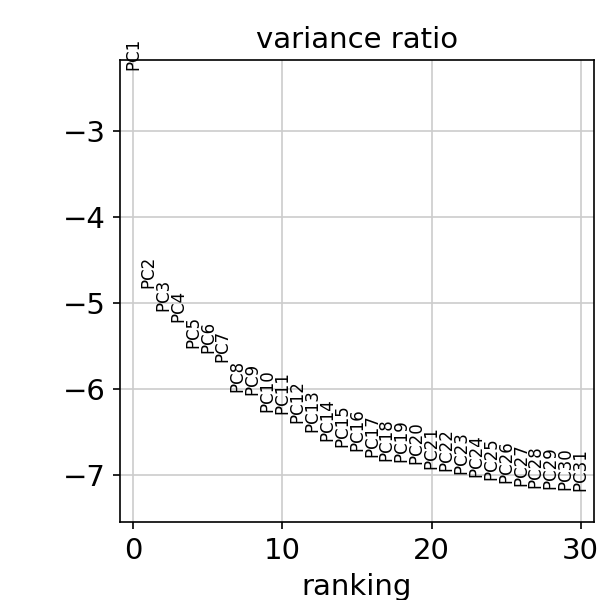

In [52]:
sc.pl.pca_variance_ratio(rna_adata, log=True, show = True)
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/variance ration.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/variance ration.png')

### From the PCA variance ratio plot, we notice PC1 component explains most variance in the RNA-seq data, the other components are equally low, especially after PC7 component

In [ ]:
# rna_adata.write(results_file)

In [ ]:
rna_adata

AnnData object with n_obs × n_vars = 10309 × 25403
    obs: 'n_genes'
    var: 'n_cells'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

### We've used PCA to reduce dimensions for the RNAseq data

### Now, using NMF to do dimensionality reduction on the scATAC-seq data

In [ ]:
# load_data(r'C:\Users\papu_\OneDrive\Desktop\University Courses\2nd Semester\Machine Learning Bioinformatics INFO-I 529\Assignment 1\data\ATACseq')
# nmf_adata = sc.read_mtx('C:\\Users\\papu_\\OneDrive\\Desktop\\University Courses\\2nd Semester\\Machine Learning Bioinformatics INFO-I 529\\Assignment 1\\data\\ATACseq\\matrix.mtx').T
# MEMORY ERROR

In [ ]:
from scipy.io import mmread
atac_dir = r'/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/data/ATACseq'

a = mmread(atac_dir + '/matrix.mtx.gz')
a = a.T
m = a.tocsr()

features_path = os.path.join(atac_dir, "features.tsv.gz")

# list of gene names, e.g. 'MIR1302-2HG'
gene_names = [row[0] for row in csv.reader(gzip.open(features_path, mode="rt"), delimiter="\t")]

# list of feature_types, e.g. 'Gene Expression'
barcodes_path = os.path.join(atac_dir, "barcodes.tsv.gz")
barcodes = [row[0] for row in csv.reader(gzip.open(barcodes_path, mode="rt"), delimiter="\t")]

atac_adata = sc.AnnData(
    m,
    dict(obs_names=barcodes),
    dict(var_names=gene_names),
)

In [ ]:
print(len(barcodes), len(gene_names))
atac_adata.obs


10309 244544


""
09A_GATGCGCGGCTA
09A_GCCATGACCCCA
09F_TGGACGATTTGT
09K_GTCTGCCATTAC
09F_GGATGAAGAGGG
...
09F_AACCTCACTGAC
09B_CACGTTAGCGCG
09L_ATGTCAGATATA
09L_AGTGGCCTCCTT


In [ ]:
sc.pp.filter_cells(atac_adata, min_genes=200)

In [ ]:
# Store raw data first
raw_atac_adata = atac_adata.copy()

In [ ]:
m1 = atac_adata.X.tocsr()
print(m1.shape)

(10309, 244544)


In [ ]:
from sklearn.decomposition import NMF
 
# Create an NMF instance: model - use 6 components
model = NMF(n_components=6)

In [ ]:
# Transform the televote_Rank: nmf_features
nmf_features = model.fit_transform(m1)

# Print the NMF features
print(nmf_features.shape)
 
print(model.components_.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


(10309, 6)
(6, 244544)


In [ ]:
nmf_features = pd.DataFrame(nmf_features)
nmf_features.index = barcodes
nmf_features = nmf_features.rename(columns = {nmf_features.columns[0]:'Gene1', nmf_features.columns[1]:'Gene2', nmf_features.columns[2]:'Gene3', nmf_features.columns[3]:'Gene4', nmf_features.columns[4]:'Gene5', nmf_features.columns[5]:'Gene6'})      
nmf_features.head()

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6
09A_GATGCGCGGCTA,0.556248,0.165305,0.000000,0.292447,0.569042,0.028362
09A_GCCATGACCCCA,0.758948,0.059965,0.349706,0.663129,0.128002,0.175804
09F_TGGACGATTTGT,0.907013,0.000000,1.049477,0.295480,0.000000,0.100128
09K_GTCTGCCATTAC,0.225484,0.635920,0.285990,0.163211,0.168870,0.018962
09F_GGATGAAGAGGG,0.587053,0.013103,0.379185,0.131839,0.092378,0.339155


### Convert this df to sc data and apply umap etc.


#### Plotting scatter to view the first two NMF components - with data points annotated with different barcodes. Genes - are column names. Barcodes (cells) are row index

In [ ]:
# Save this data as AnnData format
nmf_op = sc.AnnData(nmf_features)

### Using LDA to do dimensionality reduction on ATACseq data

In [ ]:
# Using the same processed ATAC data for LDA
gc.collect()


14985

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Specifying 6 topics for now
lda = LatentDirichletAllocation( n_components = 6, n_jobs= -1)

# The lda_weights is a n by k matrix where n is the number of documents(columns in the data) and k is the number of topics
# Words are usually the rows
# lda_f= lda.fit(m1)
# lda_weights = lda_f.transform(m1)

lda_features = lda.fit_transform(m1)
print(lda_features.shape)

(10309, 6)


In [ ]:
gc.collect()

174

In [ ]:
# To check the Variational parameters for topic word distribution:
lda_features = lda.fit_transform(m1)
lda.components_ 


array([[1.67403075e-01, 2.73301676e+01, 2.11697587e+01, ...,
        1.61547411e+02, 5.85050965e+01, 6.29648682e+01],
       [1.66666696e-01, 4.87127412e-01, 4.21130402e+00, ...,
        8.96931117e+00, 5.56502396e+00, 3.87677904e+00],
       [2.16593016e+00, 2.35054956e+01, 8.87839989e+01, ...,
        3.32281392e+02, 1.18143638e+02, 1.42436408e+02],
       [1.66666729e-01, 5.91836126e-01, 8.56782671e-01, ...,
        4.74804887e+00, 3.40231802e+00, 6.26128549e-01],
       [1.66666668e-01, 1.58867666e+01, 8.46405655e+01, ...,
        4.38037924e+02, 1.86867678e+02, 1.50690553e+02],
       [1.66666668e-01, 7.21986067e+01, 2.64337590e+02, ...,
        8.82415913e+02, 3.78516245e+02, 2.23405263e+02]])

In [ ]:
lda_features = pd.DataFrame(lda_features)
lda_features.index = barcodes
lda_features = lda_features.rename(columns = {lda_features.columns[0]:'Gene1', lda_features.columns[1]:'Gene2', lda_features.columns[2]:'Gene3', lda_features.columns[3]:'Gene4', lda_features.columns[4]:'Gene5', lda_features.columns[5]:'Gene6'})      
lda_features.head()



,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6
09A_GATGCGCGGCTA,0.089867,0.000024,0.542940,0.000024,0.293217,0.073928
09A_GCCATGACCCCA,0.061076,0.000024,0.767592,0.000023,0.162494,0.008791
09F_TGGACGATTTGT,0.331294,0.000024,0.481652,0.000024,0.177903,0.009103
09K_GTCTGCCATTAC,0.000027,0.000027,0.564208,0.000027,0.001735,0.433975
09F_GGATGAAGAGGG,0.054440,0.000034,0.770651,0.000034,0.030594,0.144246


In [ ]:
# Save this data as AnnData format
lda_op = sc.AnnData(lda_features)

### Using K-Means clustering to get clusters in all three data


### Clustering for PCA reduced RNAseq data

In [ ]:
from sklearn.cluster import KMeans

# extract pca coordinates
X_pca = rna_adata.obsm['X_pca']

kmeans = KMeans(n_clusters=6, random_state=0).fit(X_pca) 
rna_adata.obs['kmeans6'] = kmeans.labels_.astype(str)

# Create neighbors
sc.pp.neighbors(rna_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(rna_adata)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


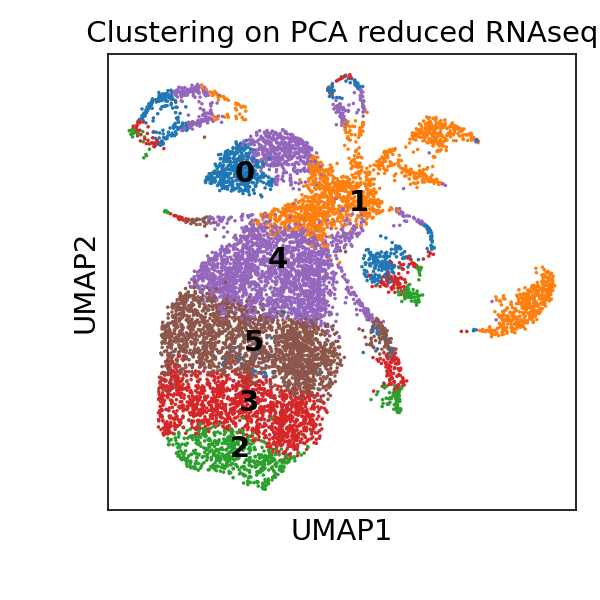

In [53]:
sc.pl.umap(rna_adata, color=['kmeans6'], legend_loc='on data', title=" Clustering on PCA reduced RNAseq ")
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/RNASEQ_PCA_KMEANS6.png')
# plt.show()
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/RNASEQ_PCA_KMEANS6.png')

### By visualizing data that originally lies on a low-dimensional, on a manifold embedded in a higher-dimensional space - we see the clusters formed by K-Means on the PCA reduced RNA-seq data is not very interpretable and something doesn't look right - there is no real difference between the six clusters.

#### Marker genes for every cluster for PCA reduced data: 

In [95]:
all_clusters = list(rna_adata.obs['kmeans6'].values)
pca_marker_0 =  rna_adata.obs.index[all_clusters.index('0')]
pca_marker_1 =  rna_adata.obs.index[all_clusters.index('1')]
pca_marker_2 =  rna_adata.obs.index[all_clusters.index('2')]
pca_marker_3 =  rna_adata.obs.index[all_clusters.index('3')]
pca_marker_4 =  rna_adata.obs.index[all_clusters.index('4')]
pca_marker_5 =  rna_adata.obs.index[all_clusters.index('5')]



### Clustering for NMF reduced ATACseq data

In [54]:
# X_pca = adata.obsm['X_pca']

kmeans_nmf = KMeans(n_clusters=6, random_state=0).fit(nmf_op.X) 
nmf_op.obs['kmeans6'] = kmeans_nmf.labels_.astype(str)
sc.pp.neighbors(nmf_op, n_neighbors=10, n_pcs=0)
sc.tl.umap(nmf_op)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans6' as categorical


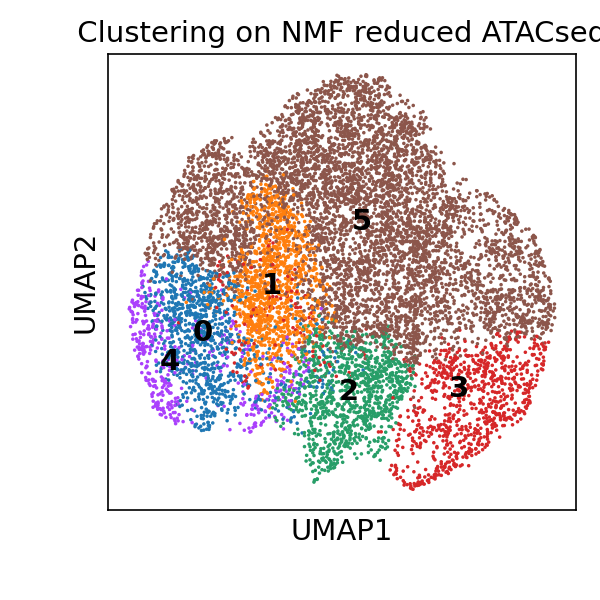

In [55]:
sc.pl.umap(nmf_op, color=['kmeans6'], legend_loc='on data', title=" Clustering on NMF reduced ATACseq ")
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/NMF_ATACSEQ_KMEANS6.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/NMF_ATACSEQ_KMEANS6.png')

### This plot of K-Means clustering on NMF reduced ATAC-seq data is a little better than the previous PCA on RNA-seq plot, because of the constraint to have positive values in the outputs, this graph is more interpretable than PCA graph.

#### Marker genes for every cluster for NMF reduced data: 

In [98]:
all_clusters = list(nmf_op.obs['kmeans6'].values)
nmf_marker_0 = nmf_op.obs.index[all_clusters.index('0')]
nmf_marker_1 = nmf_op.obs.index[all_clusters.index('1')]
nmf_marker_2 = nmf_op.obs.index[all_clusters.index('2')]
nmf_marker_3 = nmf_op.obs.index[all_clusters.index('3')]
nmf_marker_4 = nmf_op.obs.index[all_clusters.index('4')]
nmf_marker_5 = nmf_op.obs.index[all_clusters.index('5')]



### Clustering LDA reduced ATACseq data

In [56]:
kmeans_lda = KMeans(n_clusters=6, random_state=0).fit(lda_op.X) 
lda_op.obs['kmeans6'] = kmeans_lda.labels_.astype(str)
sc.pp.neighbors(lda_op, n_neighbors=10, n_pcs=0) #Need to specify n_pcs = 0 to avoid pca for other dim-red methods
sc.tl.umap(lda_op)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans6' as categorical


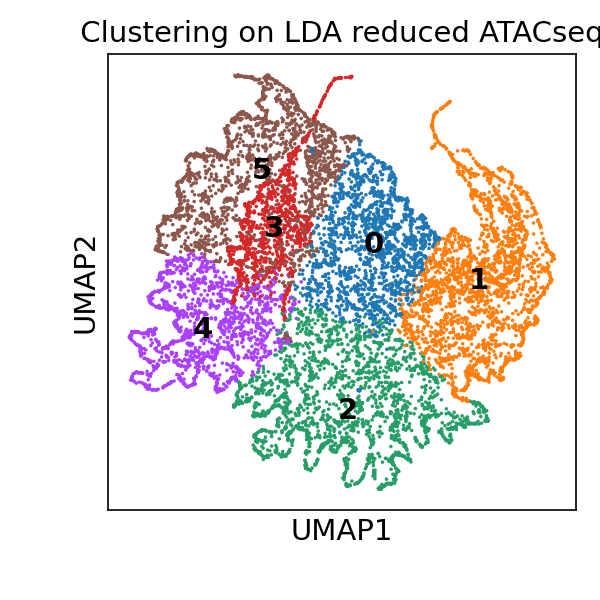

In [57]:
sc.pl.umap(lda_op, color=['kmeans6'], legend_loc='on data', title=" Clustering on LDA reduced ATACseq ")
# plt.savefig('LDA_ATACSEQ_KMEANS6.png')
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/LDA_ATACSEQ_KMEANS6.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/LDA_ATACSEQ_KMEANS6.png')


### There is no significant difference between LDA and NMF based dimensionality reduction on ATAC-seq data. This generative topic-modelling algorithm has found better borders to differentiate between different clusters.

#### Marker genes for every cluster for LDA reduced data: 

In [99]:
all_clusters = list(lda_op.obs['kmeans6'].values)
lda_marker_0 = lda_op.obs.index[all_clusters.index('0')]
lda_marker_1 = lda_op.obs.index[all_clusters.index('1')]
lda_marker_2 = lda_op.obs.index[all_clusters.index('2')]
lda_marker_3 = lda_op.obs.index[all_clusters.index('3')]
lda_marker_4 = lda_op.obs.index[all_clusters.index('4')]
lda_marker_5 = lda_op.obs.index[all_clusters.index('5')]



### Clustering raw RNAseq Data

In [58]:
# Using raw rna-data that we stored earlier, to do clustering on raw data:

kmeans_raw = KMeans(n_clusters=6, random_state=0).fit(raw_rna_adata.X)
raw_rna_adata.obs['raw_kmeans6'] = kmeans_raw.labels_.astype(str)

In [59]:
# Create neighbors
sc.pp.neighbors(raw_rna_adata, n_neighbors=10, use_rep = 'X') # Or n_pcs = 0
sc.tl.umap(raw_rna_adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [ ]:
sc.pl.umap(raw_rna_adata, color=['raw_kmeans6'], legend_loc='on data', title=" Clustering on RAW RNAseq data")
# plt.savefig('RNASEQ_RAW_KMEANS6.png')
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/RNASEQ_RAW_KMEANS6.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/RNASEQ_RAW_KMEANS6.png')


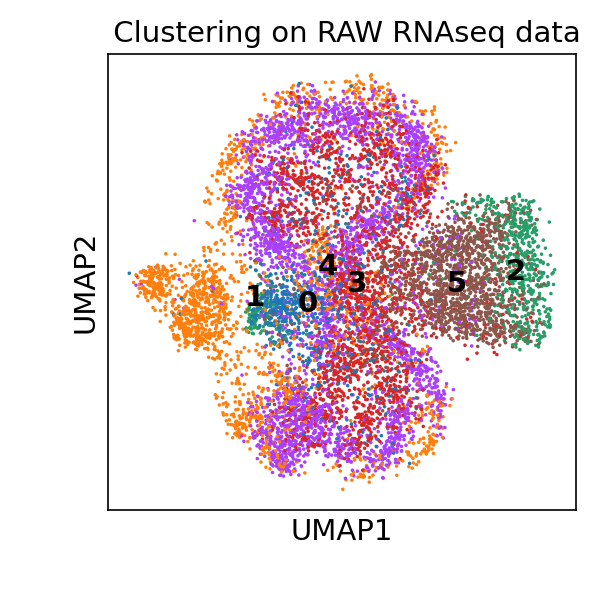

In [69]:
sc.pl.umap(raw_rna_adata, color=['raw_kmeans6'], legend_loc='on data', title=" Clustering on RAW RNAseq data")
# plt.savefig('RNASEQ_RAW_KMEANS6.png')
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/RNASEQ_RAW_KMEANS6.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/RNASEQ_RAW_KMEANS6.png')


### Clustering raw ATACseq data 

In [61]:
# Using raw atac-data that we stored earlier, to do clustering on raw data:

kmeans_atac_raw = KMeans(n_clusters=6, random_state=0).fit(raw_atac_adata.X) 
raw_atac_adata.obs['kmeans6_raw'] = kmeans_atac_raw.labels_.astype(str)
sc.pp.neighbors(raw_atac_adata, n_neighbors=10, n_pcs=0)
sc.tl.umap(raw_atac_adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:16:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [ ]:
sc.pl.umap(raw_atac_adata, color=['kmeans6_raw'], legend_loc='on data', title=" Clustering on RAW ATACseq data")
# plt.savefig('ATACSEQ_RAW_KMEANS6.png')
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/ATACSEQ_RAW_KMEANS6.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/ATACSEQ_RAW_KMEANS6.png')


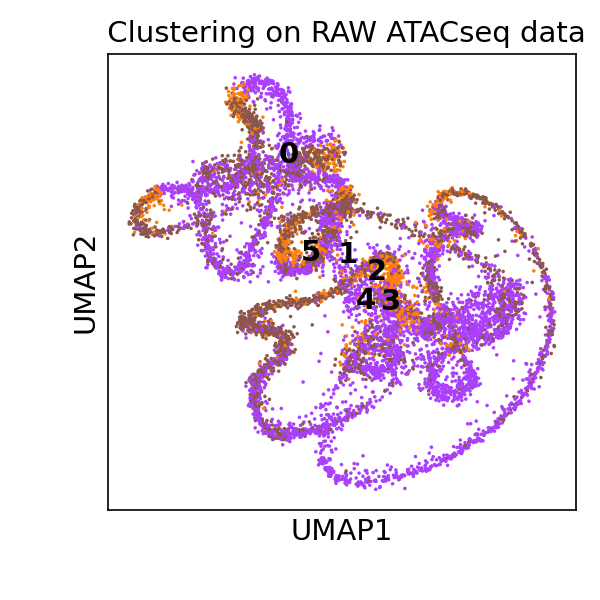

In [68]:
sc.pl.umap(raw_atac_adata, color=['kmeans6_raw'], legend_loc='on data', title=" Clustering on RAW ATACseq data")
# plt.savefig('ATACSEQ_RAW_KMEANS6.png')
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/ATACSEQ_RAW_KMEANS6.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/ATACSEQ_RAW_KMEANS6.png')


## As we see from the above two raw-data clusters (no dimensionality reduction applied), the output graphs are so noisy and random - it's almost impossible to interpret what each cluster number or group represents. This proves why dimensionality reduction is important - not only for faster computation, but also for better results.

### Evaluation: Comparing Cluster Overlap fraction using Dice coeff. or similar methods:

In [63]:
# Calculating dice coeff. : 2 * the Area of Overlap divided by the total number of data values 

# PCA vs NMF
pca_clusters = rna_adata.obs['kmeans6'].values.astype('int')
nmf_clusters = nmf_op.obs['kmeans6'].values.astype('int')

# dice_pca_nmf = (np.sum(pca_clusters == nmf_clusters) * 2.0) / (len(pca_clusters)) 
# print(dice_pca_nmf)

df_pcanmf = pd.DataFrame(columns = ['Cluster' + str(i) for i in range(6)])

# Make a dataframe ready for plotting heatmap

for i in range(6):
    pcanmf_all_clusters_dc = []
    pca_clust_i = pca_clusters == i
    for j in range(6):
        nmf_clust_j = nmf_clusters == j # these two might be different lengths

        dice_val = (np.sum( (pca_clust_i) * (nmf_clust_j) )  * 2.0) / ( np.sum(pca_clust_i) + np.sum(nmf_clust_j) )
        pcanmf_all_clusters_dc.append(dice_val)

    df_pcanmf = df_pcanmf.append({'Cluster0': pcanmf_all_clusters_dc[0], 'Cluster1': pcanmf_all_clusters_dc[1], 'Cluster2': pcanmf_all_clusters_dc[2], 'Cluster3': pcanmf_all_clusters_dc[3], 'Cluster4': pcanmf_all_clusters_dc[4], 'Cluster5': pcanmf_all_clusters_dc[5]}, ignore_index = True)

df_pcanmf.index = df_pcanmf.columns    
df_pcanmf

,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
Cluster0,0.110995,0.104707,0.103286,0.070575,0.063444,0.141281
Cluster1,0.121721,0.131970,0.048151,0.147617,0.076551,0.292977
Cluster2,0.075846,0.065748,0.162696,0.046173,0.031915,0.114692
Cluster3,0.121960,0.134974,0.197761,0.110557,0.056540,0.225545
Cluster4,0.136897,0.155689,0.110723,0.162135,0.076675,0.395405
Cluster5,0.148282,0.178797,0.144361,0.115692,0.076867,0.302244


In [64]:
# PCA vs LDA
pca_clusters = rna_adata.obs['kmeans6'].values.astype('int')
lda_clusters = lda_op.obs['kmeans6'].values.astype('int')

# dice_pca_lda = (np.sum(pca_clusters == lda_clusters) * 2.0) / (len(pca_clusters)) 
# print(dice_pca_lda)

df_pcalda = pd.DataFrame(columns = ['Cluster' + str(i) for i in range(6)])

# Make a dataframe ready for plotting heatmap

for i in range(6):
    pcalda_all_clusters_dc = []
    pca_clust_i = pca_clusters == i
    for j in range(6):
        lda_clust_j = lda_clusters == j # these two might be different lengths

        dice_val = (np.sum( (pca_clust_i) * (lda_clust_j) )  * 2.0) / ( np.sum(pca_clust_i) + np.sum(lda_clust_j) )
        pcalda_all_clusters_dc.append(dice_val)

    df_pcalda = df_pcalda.append({'Cluster0': pcalda_all_clusters_dc[0], 'Cluster1': pcalda_all_clusters_dc[1], 'Cluster2': pcalda_all_clusters_dc[2], 'Cluster3': pcalda_all_clusters_dc[3], 'Cluster4': pcalda_all_clusters_dc[4], 'Cluster5': pcalda_all_clusters_dc[5]}, ignore_index = True)

df_pcalda.index = df_pcalda.columns    
df_pcalda

,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
Cluster0,0.113222,0.127369,0.127493,0.051059,0.116229,0.119256
Cluster1,0.165180,0.202975,0.185629,0.201434,0.136919,0.136237
Cluster2,0.074678,0.095270,0.100594,0.064438,0.095910,0.128026
Cluster3,0.147765,0.164741,0.189430,0.081413,0.176928,0.196113
Cluster4,0.231219,0.252636,0.258152,0.177428,0.143569,0.185781
Cluster5,0.177936,0.244651,0.196552,0.075716,0.209059,0.208859


In [65]:
# NMF vs LDA
# nmf_clusters = nmf_op.obs['kmeans6'].values.astype('int')
# lda_clusters = lda_op.obs['kmeans6'].values.astype('int')

#### Plotting Heatmap

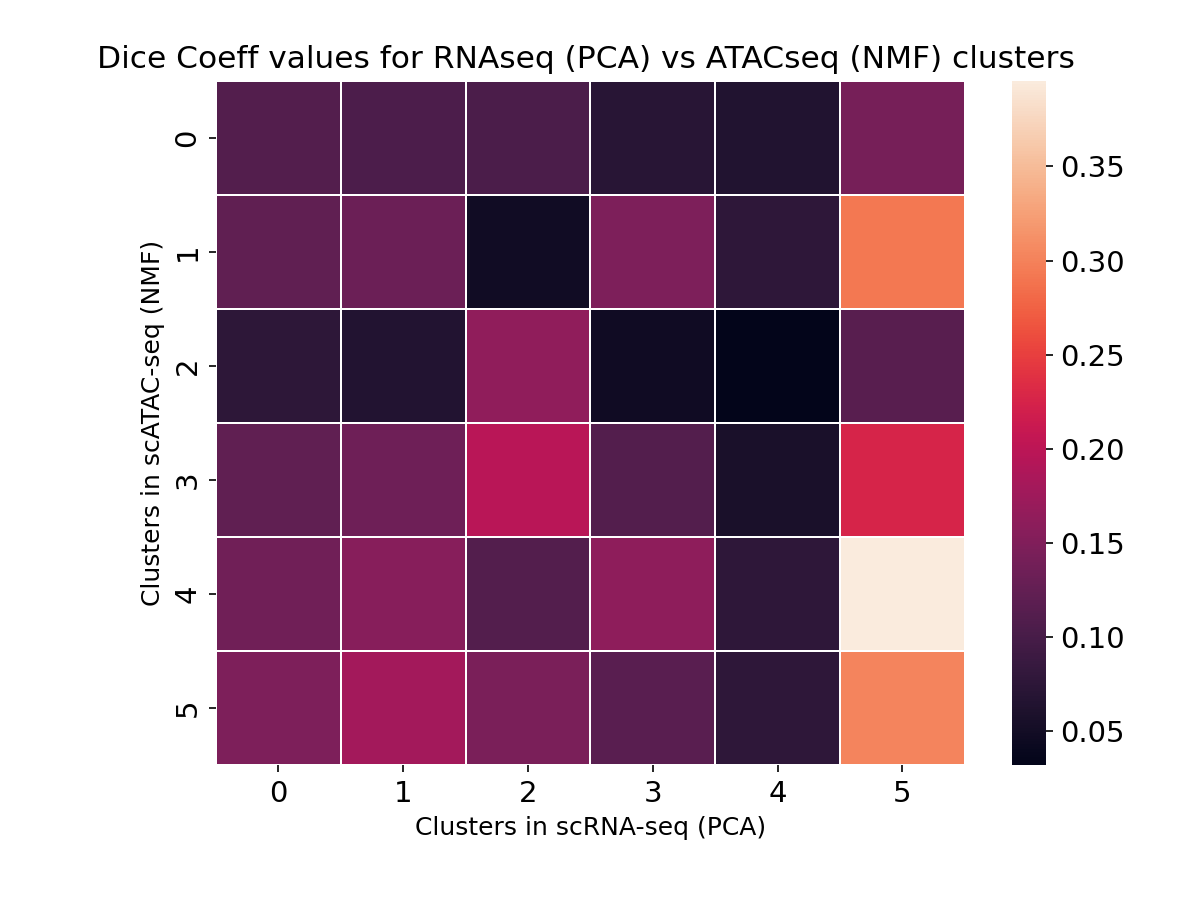

In [66]:
import seaborn as sns
from matplotlib.pyplot import figure

fig = figure(figsize=(8, 6))

df_pcanmf.columns = [0,1,2,3,4,5]
df_pcanmf.index = df_pcanmf.columns

# pcanmf_corr = df_pcanmf.corr()
sns.heatmap(df_pcanmf, linewidth=0.5)
plt.title('Dice Coeff values for RNAseq (PCA) vs ATACseq (NMF) clusters ', fontsize = 15) # title with fontsize 20
plt.xlabel('Clusters in scRNA-seq (PCA)', fontsize = 12) # x-axis label with fontsize 12
plt.ylabel('Clusters in scATAC-seq (NMF)', fontsize = 12) # y-axis label with fontsize 12
# plt.show()
# plt.savefig('PCA_NMF_DICE_COEFF.png')
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/PCA_NMF_DICE_COEFF.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/PCA_NMF_DICE_COEFF.png')

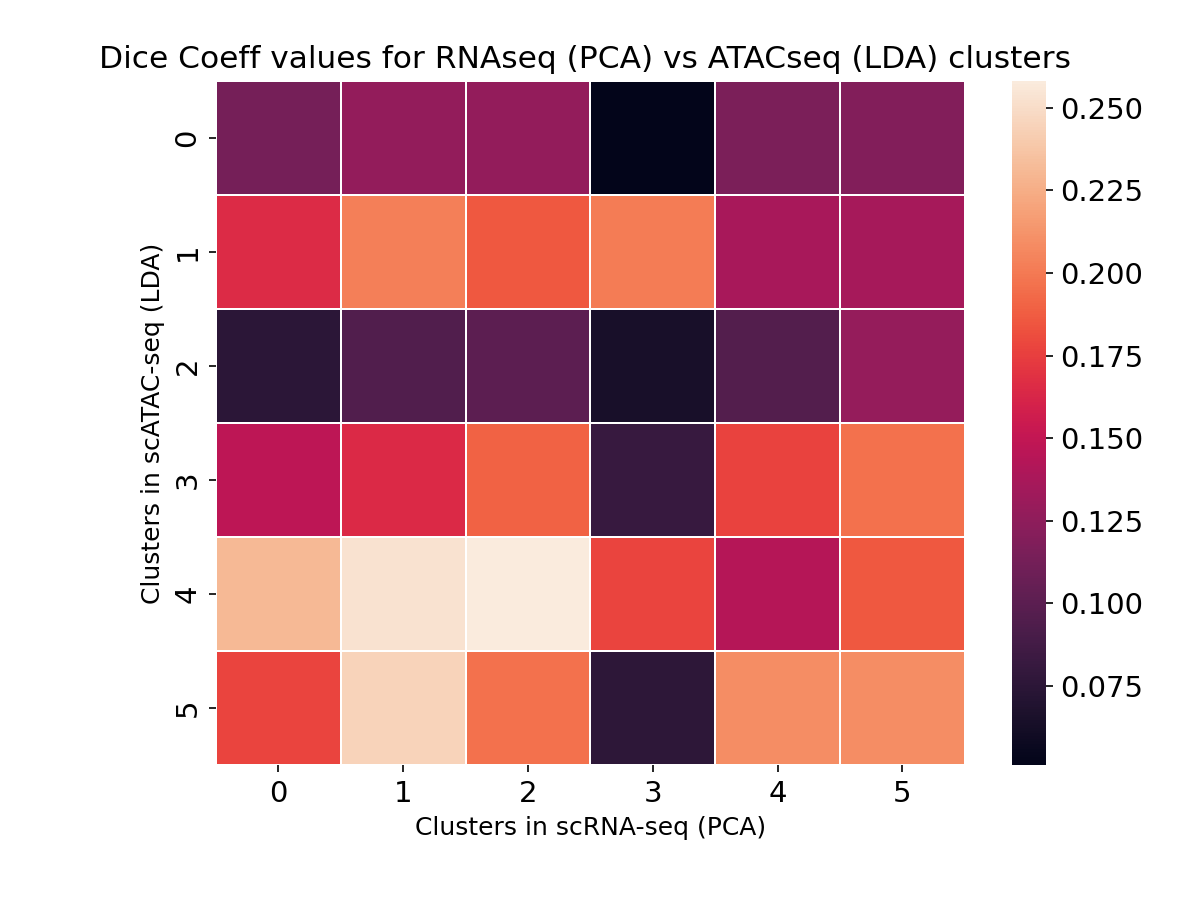

In [67]:
import seaborn as sns
from matplotlib.pyplot import figure

fig = figure(figsize=(8, 6))

df_pcalda.columns = [0,1,2,3,4,5]
df_pcalda.index = df_pcalda.columns

# pcanmf_corr = df_pcanmf.corr()
sns.heatmap(df_pcalda, linewidth=0.5)
plt.title('Dice Coeff values for RNAseq (PCA) vs ATACseq (LDA) clusters ', fontsize = 15) # title with fontsize 20
plt.xlabel('Clusters in scRNA-seq (PCA)', fontsize = 12) # x-axis label with fontsize 12
plt.ylabel('Clusters in scATAC-seq (LDA)', fontsize = 12) # y-axis label with fontsize 12
# plt.show()
# plt.savefig('PCA_LDA_DICE_COEFF.png')
plt.savefig('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/PCA_LDA_DICE_COEFF.png')
from IPython.display import Image
Image('/content/drive/My Drive/Projects and research stuffs/Assignment 1 - ML for Bio/PCA_LDA_DICE_COEFF.png')

## Explanation:

### In this experiment, I work with PCA reduced RNAseq data and NMF, LDA reduced ATACseq data, and both these data is said to be collected from same tissue samples. Using k-means clustering to create 6 clusters (with random inital seeding - so results are subject to minor changes at each run) in each of those PCA, NMF and LDA reduced data and then by plotting the above two heatmaps with values pointing to the Dice coefficient values of each cluster in PCA against another cluster of both NMF and LDA. 

### We can see that in PCA vs NMF plot, cluster 5 in both dimensionality reduction methods has the most overlap. Meaning for group of genes with marker gene 09A_ACAGCCGCCATC from PCA reduced data and the  group of genes with marker gene 09I_AAGTTGAGTGCG from NMF reduced data have high overlap. 

### Also cluster 4 in NMF and cluster 5 in PCA have the highest dice coeff. value of 0.39 - but they are two different clusters and having overlaps on groups of genes with marker gene 09A_ACAGCCGCCATC from PCA reduced data and group of genes with marker gene 09A_GCCTTCTTCCGT from NMF reduced data have highest similarity possible.

### Similarly, we can see that in PCA vs LDA plot, cluster 1 and cluster 5 (maybe also cluster 4) in both dimensionality reduction methods have good overlap. Meaning in cluster 1, the group of genes with marker gene of 09A_TTGTCTGTGACT from PCA reduced data and the group of genes with marker gene 09E_GTAGAACGTCTT from LDA reduced data have high overlap. And in cluster 5, the group of genes with marker gene of 09A_ACAGCCGCCATC from PCA reduced data and the group of genes with marker gene 09J_GCGTTCGGCTAC from LDA reduced data have good overlap.  